# Description Automatique d'Images avec Hugging Face

Ce notebook montre comment générer automatiquement des descriptions textuelles d'images en utilisant des modèles gratuits d'Hugging Face.

## Installation des dépendances

In [1]:
!pip install transformers pillow torch torchvision requests matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7e/65/07d5f5c7f7c994f12c768708bd2e17a4f01a2b0f44a1c9eccad872433e2e/matplotlib-3.10.8-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Using cached matplotlib-3.10.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (52 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/53/3e/405b59cfa13021a56bba395a6b3aca8cec012b45bf177b0eaf7a202cde2c/contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/6f/16/7decaa2

## Méthode 1: BLIP 

In [2]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
from io import BytesIO

# Charger le modèle BLIP
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

print("Modèle BLIP chargé avec succès!")

/Users/morgangautherot/Documents/code/hackathon/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/Users/morgangautherot/Documents/code/hackathon/venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:798: UserWarning: Not enough free disk space to download the file. The expected file size is: 989.72 MB. The target location /Users/morgangautherot/.cache/huggingface/hub/models--Salesforce--blip-image-captioning-base/blobs only has 305.59 MB free disk space.
  warnings.war

Modèle BLIP chargé avec succès!


In [3]:
# Fonction pour charger une image
def load_image(image_path_or_url):
    """Charge une image depuis une URL ou un chemin local"""
    if image_path_or_url.startswith('http'):
        response = requests.get(image_path_or_url)
        image = Image.open(BytesIO(response.content))
    else:
        image = Image.open(image_path_or_url)
    return image.convert('RGB')

# Fonction pour générer une description
def generate_description(image, prompt=None):
    """Génère une description de l'image
    
    Args:
        image: Image PIL
        prompt: Optionnel - texte pour guider la génération (ex: "a photo of")
    """
    if prompt:
        inputs = processor(image, prompt, return_tensors="pt")
    else:
        inputs = processor(image, return_tensors="pt")
    
    out = model.generate(**inputs, max_length=50)
    description = processor.decode(out[0], skip_special_tokens=True)
    return description

Description: a cat sitting on a couch with pillows


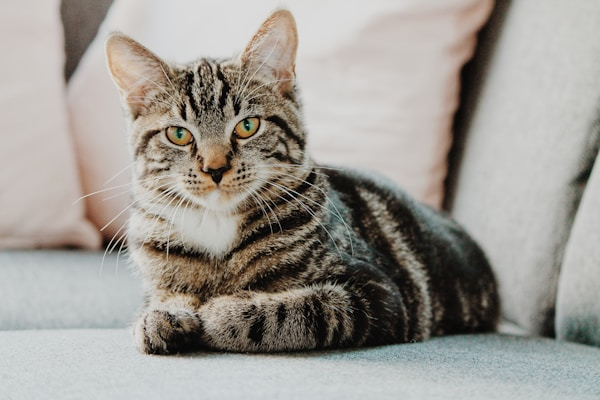

In [4]:
# Exemple 1: Image depuis une URL
image_url = "https://images.unsplash.com/photo-1518791841217-8f162f1e1131?w=600"

image = load_image(image_url)
description = generate_description(image)

print(f"Description: {description}")
display(image)